In [1]:
!pip install matplotlib deap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 4.0 MB/s eta 0:00:00


In [2]:
# Required Libraries
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

In [3]:
# Task 1 - Define the number of locations and vehicles
num_locations = 20  # Define how many locations (excluding the depot) the vehicles need to visit
locations = [(random.randint(0, 100), random.randint(0, 100)) for _ in range(num_locations)]  # Generate random (x, y) coordinates for each location
depot = (50, 50)  # Define the central depot location as a fixed point
num_vehicles = 3  # Define how many vehicles are available to visit the locations

In [4]:
# Genetic Algorithm Setup
creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0))  # Define fitness function to minimize. The two objectives are total distance and balance penalty.
creator.create("Individual", list, fitness=creator.FitnessMin)  # Define individual structure. Individuals are lists with a fitness attribute.

In [5]:
# Task 2 - Finish setting up the individuals and population
toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)  # Function to generate a list of unique, randomly ordered location indices
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)  # Function to create an individual as a shuffled list of location indices
toolbox.register("population", tools.initRepeat, list, toolbox.individual)  # Function to create a population of individuals

In [6]:
# Fitness Function
def evalVRP(individual):
    total_distance = 0
    distances = []  # Track distance traveled by each vehicle for balance calculation
    # Split the list of locations among vehicles, ensuring each starts and ends at the depot
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        # Calculate total distance traveled by this vehicle
        vehicle_distance = sum(np.linalg.norm(np.array(vehicle_route[k+1]) - np.array(vehicle_route[k])) for k in range(len(vehicle_route)-1))
        total_distance += vehicle_distance
        distances.append(vehicle_distance)
    balance_penalty = np.std(distances)  # Use standard deviation of distances as a penalty for imbalance among vehicles
    return total_distance, balance_penalty

In [7]:
toolbox.register("evaluate", evalVRP)  # Register the evaluation function
toolbox.register("mate", tools.cxPartialyMatched)  # Register the crossover function suitable for permutation-based representation
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)  # Register the mutation function to shuffle indices with a 5% chance per index
toolbox.register("select", tools.selTournament, tournsize=3)  # Register the selection function using tournament selection

In [8]:
# Plotting Function
def plot_routes(individual, title="Routes"):
    plt.figure()
    # Plot locations as blue dots and the depot as a red square
    for (x, y) in locations:
        plt.plot(x, y, 'bo')
    plt.plot(depot[0], depot[1], 'rs')

    # Draw routes for each vehicle
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        plt.plot(*zip(*vehicle_route), '-')

    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

gen	nevals	avg    	min    
0  	300   	621.359	2.61876
1  	213   	601.655	1.85874
2  	243   	590.608	1.95934
3  	232   	581.372	2.44827
4  	233   	574.397	2.44827
5  	218   	564.378	2.69288
6  	213   	562.237	1.90246
7  	233   	550.664	1.90246
8  	219   	539.672	1.90246
9  	209   	511.708	3.43211
10 	224   	493.189	1.67749
11 	230   	456.89 	3.21245
12 	230   	420.536	3.45015
13 	217   	402.815	6.23678
14 	231   	392.183	6.23678
15 	250   	380.976	4.31458
16 	238   	360.587	4.31458
17 	236   	361.551	2.43767
18 	225   	360.189	2.19848
19 	225   	357.409	2.34336
20 	209   	355.601	2.34336
21 	232   	345.693	1.88327
22 	237   	337.951	2.19848
23 	217   	329.611	2.34336
24 	227   	319.844	2.34336
25 	246   	316.295	4.61633
26 	233   	309.774	5.96257
27 	219   	308.888	0.90257
28 	229   	309.476	9.74841
29 	223   	305.968	10.6166
30 	238   	305.719	0.849601
31 	225   	301.496	10.2017 
32 	221   	306.723	9.24684 
33 	243   	300.732	7.60172 
34 	232   	299.923	8.87838 
35 	244   	296.604	6.71

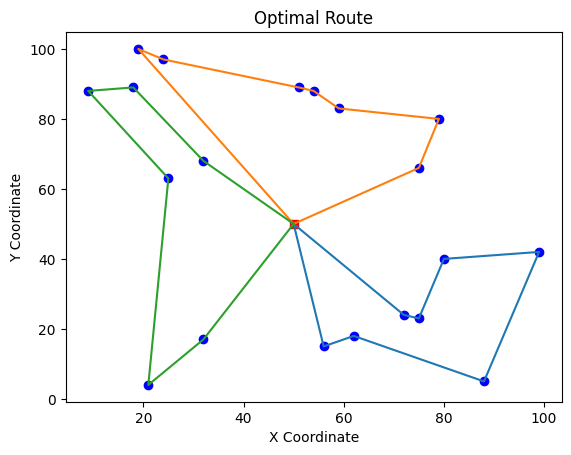

In [9]:
# Running the Genetic Algorithm
def main():
    random.seed(42)  # Seed for reproducibility
    pop = toolbox.population(n=300)  # Generate initial population
    hof = tools.HallOfFame(1)  # Hall of Fame to store the best individual

    # Setup statistics to track
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    # Run the genetic algorithm
    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 300, stats=stats, halloffame=hof)

    # Plot the best route found
    plot_routes(hof[0], "Optimal Route")
    return pop, stats, hof

if __name__ == "__main__":
    main()

In [12]:
# Parameter Tuning Function
def parameter_tuning():
    pop_sizes = [100, 300, 500]
    mutation_rates = [0.05, 0.1, 0.2]
    tourn_sizes = [3, 5, 7]

    best_results = []

    for pop_size in pop_sizes:
        for mut_rate in mutation_rates:
            for tourn_size in tourn_sizes:
                random.seed(42)
                pop = toolbox.population(n=pop_size)
                hof = tools.HallOfFame(1)

                toolbox.unregister("mutate")
                toolbox.unregister("select")
                toolbox.register("mutate", tools.mutShuffleIndexes, indpb=mut_rate)
                toolbox.register("select", tools.selTournament, tournsize=tourn_size)

                stats = tools.Statistics(lambda ind: ind.fitness.values)
                stats.register("avg", np.mean)
                stats.register("min", np.min)

                algorithms.eaSimple(pop, toolbox, 0.7, mut_rate, 300, stats=stats, halloffame=hof)

                best_results.append((pop_size, mut_rate, tourn_size, hof[0].fitness.values))

    # Print best results for comparison
    for result in best_results:
        print(f"Pop: {result[0]}, Mut: {result[1]}, Tourn: {result[2]} -> Fitness: {result[3]}")

In [13]:
# Fitness Score Analysis Function
def main_with_fitness_analysis():
    random.seed(42)
    pop = toolbox.population(n=300)
    hof = tools.HallOfFame(1)

    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    logbook = tools.Logbook()
    pop, logbook = algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 300, stats=stats, halloffame=hof, verbose=True)

    gen = logbook.select("gen")
    fit_mins = logbook.select("min")
    fit_avgs = logbook.select("avg")

    plt.figure()
    plt.plot(gen, fit_mins, label="Min Fitness")
    plt.plot(gen, fit_avgs, label="Avg Fitness")
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.title("Fitness Score Over Generations")
    plt.legend()
    plt.show()

    plot_routes(hof[0], "Optimal Route")
    return pop, stats, hof

In [14]:
# Solution Diversity Analysis Function
def diversity_analysis(population):
    def hamming_dist(ind1, ind2):
        return sum(i1 != i2 for i1, i2 in zip(ind1, ind2))

    diversity = []
    for gen in range(300):  # Assuming 300 generations
        pairwise_distances = [
            hamming_dist(ind1, ind2)
            for i, ind1 in enumerate(population)
            for ind2 in population[i+1:]
        ]
        avg_diversity = np.mean(pairwise_distances)
        diversity.append(avg_diversity)

        # Perform one step of the algorithm
        algorithms.eaSimple(population, toolbox, 0.7, 0.2, 1)

    # Plot diversity over generations
    plt.figure()
    plt.plot(range(300), diversity)
    plt.xlabel("Generation")
    plt.ylabel("Average Pairwise Hamming Distance")
    plt.title("Solution Diversity Over Generations")
    plt.show()

gen	nevals
0  	300   
1  	230   
gen	nevals
0  	0     
1  	222   
gen	nevals
0  	0     
1  	238   
gen	nevals
0  	0     
1  	234   
gen	nevals
0  	0     
1  	236   
gen	nevals
0  	0     
1  	225   
gen	nevals
0  	0     
1  	223   
gen	nevals
0  	0     
1  	233   
gen	nevals
0  	0     
1  	226   
gen	nevals
0  	0     
1  	221   
gen	nevals
0  	0     
1  	232   
gen	nevals
0  	0     
1  	234   
gen	nevals
0  	0     
1  	221   
gen	nevals
0  	0     
1  	235   
gen	nevals
0  	0     
1  	219   
gen	nevals
0  	0     
1  	223   
gen	nevals
0  	0     
1  	220   
gen	nevals
0  	0     
1  	233   
gen	nevals
0  	0     
1  	239   
gen	nevals
0  	0     
1  	222   
gen	nevals
0  	0     
1  	237   
gen	nevals
0  	0     
1  	239   
gen	nevals
0  	0     
1  	231   
gen	nevals
0  	0     
1  	206   
gen	nevals
0  	0     
1  	222   
gen	nevals
0  	0     
1  	230   
gen	nevals
0  	0     
1  	225   
gen	nevals
0  	0     
1  	228   
gen	nevals
0  	0     
1  	221   
gen	nevals
0  	0     
1  	223   
gen	nevals

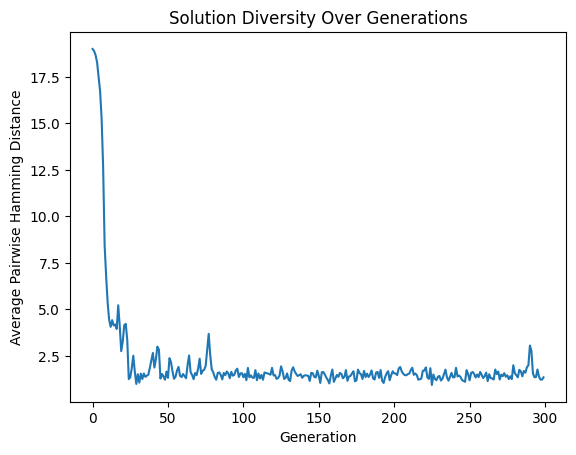

In [15]:
# Main Function to run all analyses
if __name__ == "__main__":
    # Uncomment to run the desired function
    #parameter_tuning()
    #main_with_fitness_analysis()
    pop = toolbox.population(n=300)
    diversity_analysis(pop)